**Import all required library**

In [0]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)
import plotly.express as px

In [0]:
!pip install pandas-profiling


  Stored in directory: C:\Users\Infinity\AppData\Local\pip\Cache\wheels\ce\c7\f1\dbfef4848ebb048cb1d4a22d1ed0c62d8ff2523747235e19fe
  Stored in directory: C:\Users\Infinity\AppData\Local\pip\Cache\wheels\43\07\ac\7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Stored in directory: C:\Users\Infinity\AppData\Local\pip\Cache\wheels\b0\b2\96\2074eee7dbf7b7df69d004c9b6ac4e32dad04fb7666cf943bd
Successfully built pandas-profiling htmlmin confuse
Note: you may need to restart the kernel to use updated packages.


**Importing Dataset**

In [0]:
df_md = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/1000%20movies%20data.csv')


#profile = df_md.profile_report(title="Movie Data Profiling")
#profile.to_file(output_file="movie_data_profiling_after_preprocessing.html")

# **Description of Dataset**

In [0]:
df_md.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [0]:
df_md.tail()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0
999,1000,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


In [0]:
df_md.dtypes

Rank                    int64
Title                  object
Genre                  object
Description            object
Director               object
Actors                 object
Year                    int64
Runtime (Minutes)       int64
Rating                float64
Votes                   int64
Revenue (Millions)    float64
Metascore             float64
dtype: object

# **Data Pre-Processing**
**Fill Metascore Null value with median value**

In [0]:
df_md.Metascore.fillna(df_md.Metascore.median(),inplace=True)

In [0]:
df_md.isnull().sum()

Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
dtype: int64

**Fill Revenue Null value with median value**

In [0]:
#df_md.dropna(subset=['Revenue_(Millions)'], inplace=True)
df_md['Revenue (Millions)'].fillna(df_md['Revenue (Millions)'].median(),inplace=True) 

**Post Processing Data Profiling**

In [0]:
#import pandas_profiling
profile = df_md.profile_report(title="Movie Data Profiling",correlations={'kendall': False})
profile.to_file(output_file="movie_data_001_profiling_after_preprocessing.html")

**Dataset Description**

In [0]:
df_md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Rank                  1000 non-null int64
Title                 1000 non-null object
Genre                 1000 non-null object
Description           1000 non-null object
Director              1000 non-null object
Actors                1000 non-null object
Year                  1000 non-null int64
Runtime (Minutes)     1000 non-null int64
Rating                1000 non-null float64
Votes                 1000 non-null int64
Revenue (Millions)    1000 non-null float64
Metascore             1000 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.8+ KB


In [0]:
df_md.describe()

,Rank,Year,Runtime_(Minutes),Rating,Votes,Revenue_(Millions),Metascore
count,872.000000,872.000000,872.000000,872.000000,8.720000e+02,872.000000,872.000000
mean,492.735092,2012.478211,114.783257,6.814335,1.909701e+05,82.956376,59.572248
std,288.134843,3.183552,18.633144,0.881674,1.921325e+05,103.253540,16.618256
min,1.000000,2006.000000,66.000000,1.900000,1.780000e+02,0.000000,11.000000
25%,243.750000,2010.000000,101.000000,6.300000,6.062750e+04,13.270000,48.000000
50%,488.500000,2013.000000,112.000000,6.900000,1.346540e+05,47.985000,59.500000
75%,739.250000,2015.000000,125.000000,7.500000,2.678330e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [0]:
df_md.dtypes

Rank                    int64
Title                  object
Genre                  object
Description            object
Director               object
Actors                 object
Year                    int64
Runtime_(Minutes)       int64
Rating                float64
Votes                   int64
Revenue_(Millions)    float64
Metascore             float64
dtype: object

In [13]:
!pip install matplotlib

In [0]:
df_md['Year'].value_counts()

2016    297
2015    127
2014     98
2013     91
2012     64
2011     63
2010     60
2007     53
2008     52
2009     51
2006     44
Name: Year, dtype: int64

In [0]:
x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

**Movies Released yearly**

In [12]:
explode = [0.05 for i in range(len(df_md['Year'].value_counts().index))]

df_md['Year'].value_counts().plot(kind='pie', explode=explode, fontsize=14, autopct='%3.1f%%', 
                                               figsize=(10,10), shadow=True, startangle=135, legend=True,cmap='summer')

plt.ylabel('Year')
plt.title('Pie chart showing the proportion of each Year Movies Released value')

Text(0.5, 1, 'Pie chart showing the proportion of each Year Movies Released value')

In [11]:
df_md['Year'].plot(kind='kde', figsize=(15, 7), color='black')

plt.xlabel('Year')
plt.ylabel('Density')
plt.title('KDE plot showing the density of Rating values')

Text(0.5, 1, 'KDE plot showing the density of Rating values')

In [0]:
!pip install plotly

  Stored in directory: C:\Users\dipak\AppData\Local\pip\Cache\wheels\d7\a9\33\acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


# **Top Ten Runtime Movies**

In [22]:
runtimeData = df_md.iloc[df_md['Runtime (Minutes)'].sort_values(ascending=False)[:10].index, :]

figRuntimeData = px.bar(runtimeData, x='Title', y='Runtime (Minutes)',
             hover_data=['Actors', 'Genre'], color='Runtime (Minutes)',
             labels={'Title':'Top Runtime Movies'}, height=400)
figRuntimeData.show()

# **Top Ten Rating Movies**

In [23]:
ratingData = df_md.iloc[df_md['Rating'].sort_values(ascending=False)[:10].index, :]

figRatingData = px.bar(ratingData, x='Title', y='Rating',
             hover_data=['Actors', 'Genre'], color='Rating',
             labels={'Title':'Top Rating Movies'}, height=400)
figRatingData.show()

# **Top Ten Votes Movies**

In [0]:
votesData =df_md.iloc[df_md['Votes'].sort_values(ascending=False)[:10].index, :]
figVotesData = px.bar(votesData, x='Title', y='Votes',
             hover_data=['Actors', 'Genre'], color='Votes',
             labels={'Title':'Top Votes Movies'}, height=400)
figVotesData.show()

# **Top Ten Revenue Movies**

In [0]:
revenueData = df_md.iloc[df_md['Revenue (Millions)'].sort_values(ascending=False)[:10].index, :]

figRevenueData = px.bar(revenueData, x='Title', y='Revenue (Millions)',
             hover_data=['Actors', 'Genre'], color='Revenue (Millions)',
             labels={'Title':'Top Revenue Movies'}, height=400)
figRevenueData.show()

# **Top Ten Revenue Movies**

In [24]:
metascoreData = df_md.iloc[df_md['Metascore'].sort_values(ascending=False)[:10].index, :]
metascoreData = px.bar(metascoreData, x='Title', y='Metascore',
             hover_data=['Actors', 'Genre'], color='Metascore',
             labels={'Title':'Top Revenue Movies'}, height=400)
metascoreData.show()

In [0]:
df_md.dtypes

Rank                    int64
Title                  object
Genre                  object
Description            object
Director               object
Actors                 object
Year                    int64
Runtime_(Minutes)       int64
Rating                float64
Votes                   int64
Revenue_(Millions)    float64
Metascore             float64
dtype: object

In [0]:
df_md.Genre.unique()

array(['Action,Adventure,Sci-Fi', 'Adventure,Mystery,Sci-Fi',
       'Horror,Thriller', 'Animation,Comedy,Family',
       'Action,Adventure,Fantasy', 'Comedy,Drama,Music',
       'Action,Adventure,Biography', 'Adventure,Drama,Romance',
       'Adventure,Family,Fantasy', 'Biography,Drama,History',
       'Animation,Adventure,Comedy', 'Action,Comedy,Drama',
       'Action,Thriller', 'Biography,Drama', 'Drama,Mystery,Sci-Fi',
       'Adventure,Drama,Thriller', 'Drama', 'Action,Adventure,Drama',
       'Comedy', 'Drama,Thriller', 'Action,Adventure,Comedy',
       'Action,Horror,Sci-Fi', 'Adventure,Drama,Sci-Fi',
       'Action,Adventure,Western', 'Comedy,Drama',
       'Action,Crime,Thriller', 'Action,Crime,Drama',
       'Adventure,Drama,History', 'Crime,Horror,Thriller',
       'Drama,Romance', 'Comedy,Drama,Romance', 'Crime,Drama,Mystery',
       'Drama,Romance,Thriller', 'Drama,History,Thriller',
       'Action,Drama,Thriller', 'Action,Drama,Romance', 'Drama,Fantasy',
       'Action,Sc

In [0]:
#df_md.groupby(['Genre'])['Runtime_(Minutes)'].mean().sort_values().plot(kind='area', figsize=(15,7), fontsize=13, color='orange')
#plt.ylabel('Revenue (in million INR)')

In [0]:
genreData = df_md.iloc[df_md['Genre'].sort_values(ascending=False)[:10].index, :]

In [0]:
genreData.dtypes

Rank                    int64
Title                  object
Genre                  object
Description            object
Director               object
Actors                 object
Year                    int64
Runtime_(Minutes)       int64
Rating                float64
Votes                   int64
Revenue_(Millions)    float64
Metascore             float64
dtype: object

In [25]:
df_md.plot.scatter(x='Revenue (Millions)',y='Votes',c='DarkBlue')

Text(0, 0.5, 'Sugar')

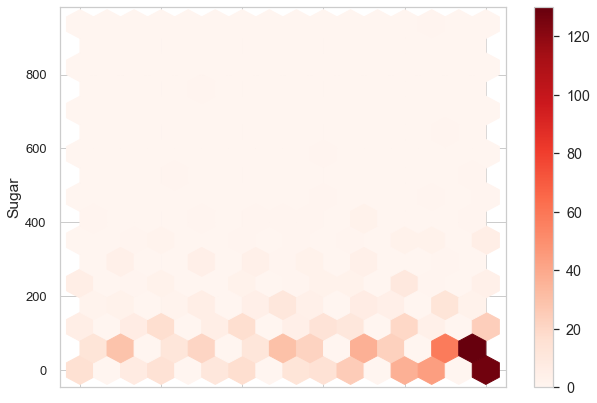

In [0]:
df_md.plot(kind='hexbin', figsize=(10,7), fontsize=13, gridsize=15, colormap='Reds',x="Year", y="Revenue (Millions)")
plt.ylabel('Revenue')

In [0]:
plt.hexbin(df_md['Year'], df_md['Revenue (Millions)'], gridsize=(10,10), cmap=plt.cm.Greens)
plt.show()

In [0]:
# df_md.plot.scatter(x='Metascore',y='Rating',c='DarkBlue')

In [0]:
genreData = df_md.iloc[df_md['Rating'].sort_values(ascending=False)[:10].index, :]

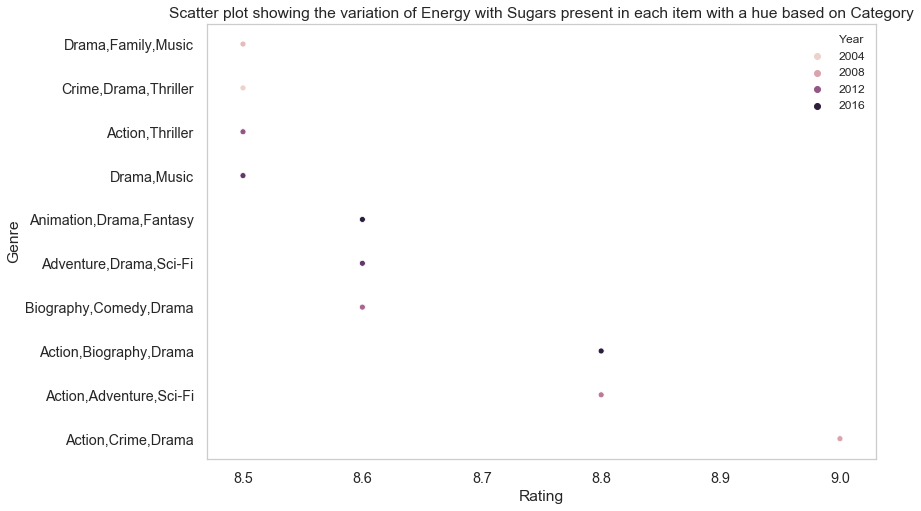

In [0]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=genreData, x='Rating', y='Genre', hue='Year')

plt.xlabel('Rating')
plt.ylabel('Genre')
plt.title('Scatter plot showing the variation of Energy with Sugars present in each item with a hue based on Category')
plt.grid(False)
plt.legend(fontsize=12)

In [0]:
import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To adjust seaborn settings for the plots.


In [0]:
df_md['Rating']

0      8.1
1      7.0
2      7.3
3      7.2
4      6.2
5      6.1
6      8.3
7      6.4
8      7.1
9      7.0
10     7.5
11     7.8
12     7.9
13     7.7
14     6.4
15     6.6
16     8.2
17     6.7
18     8.1
19     8.0
20     6.7
21     7.9
22     6.7
23     6.5
24     5.3
25     6.8
26     8.3
27     4.7
28     6.2
29     5.9
      ... 
970    4.8
971    6.9
972    5.9
973    6.2
974    7.4
975    6.0
976    6.2
977    5.0
978    7.0
979    7.6
980    7.0
981    5.3
982    7.4
983    6.5
984    6.8
985    5.6
986    5.9
987    6.3
988    7.1
989    7.5
990    6.6
991    8.5
992    6.3
993    5.9
994    6.7
995    6.2
996    5.5
997    6.2
998    5.6
999    5.3
Name: Rating, Length: 1000, dtype: float64

Text(0.5, 1.0, 'Histogram showing the distribution of Serve Size values')

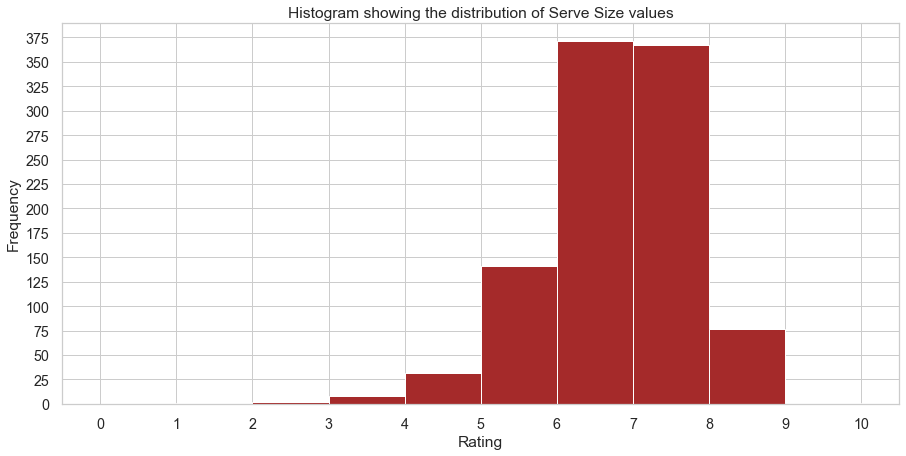

In [0]:
bins = [0,1,2,3,4,5,6,7,8,9,10]
df_md['Rating'].plot(kind='hist', bins = bins, figsize=(15, 7), color='brown', yticks=np.arange(0,400,25), xticks=bins)

plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Histogram showing the distribution of Serve Size values')

Text(0.5, 1.0, 'KDE plot showing the density of Rating values')

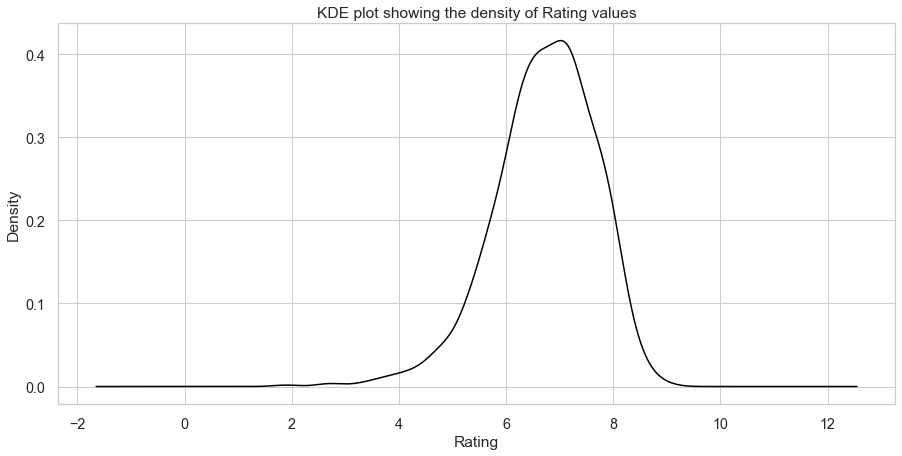

In [0]:
df_md['Rating'].plot(kind='kde', figsize=(15, 7), color='black')

plt.xlabel('Rating')
plt.ylabel('Density')
plt.title('KDE plot showing the density of Rating values')

Text(0.5, 1.0, 'KDE plot showing the density of Rating values')

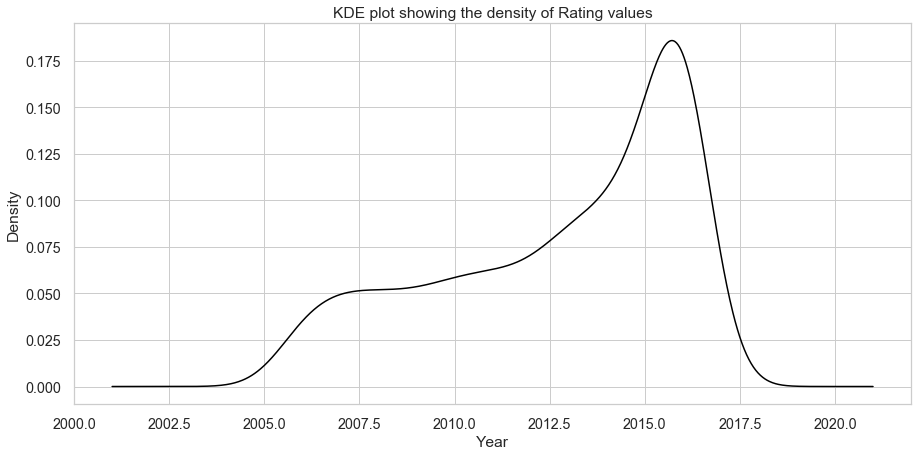

Text(0, 0.5, 'Sugar')

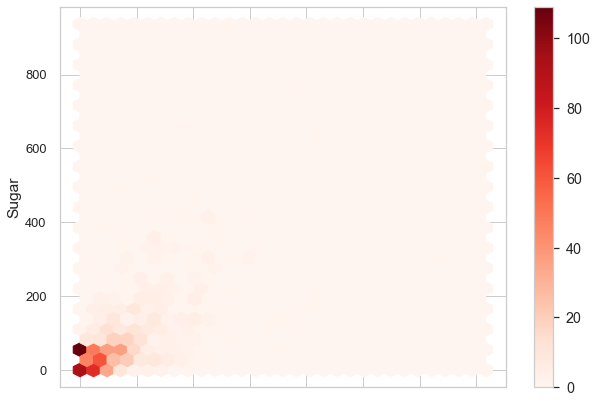

In [0]:
df_md.plot(kind='hexbin', figsize=(10,7), fontsize=13, gridsize=30, colormap='Reds',x="Votes", y="Revenue (Millions)")
plt.ylabel('Sugar')

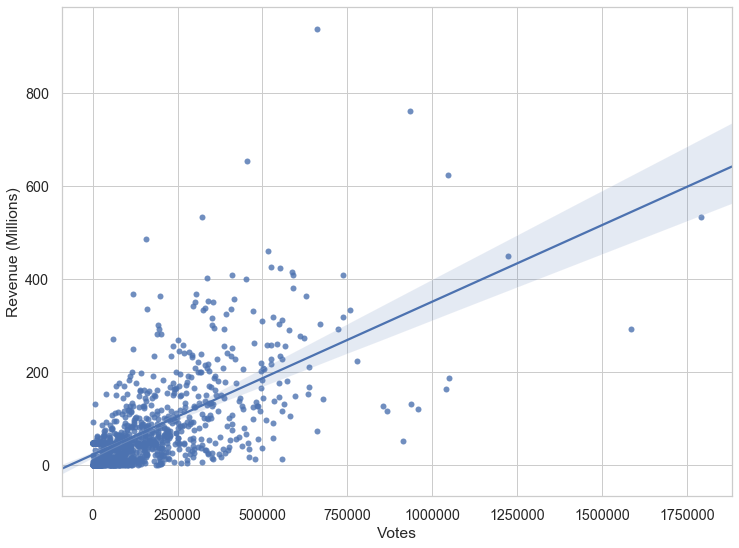

In [0]:
plt.figure(figsize=(12,9))
sns.regplot(x="Votes", y="Revenue (Millions)", data=df_md)

Text(0.5, 0, 'Rating')

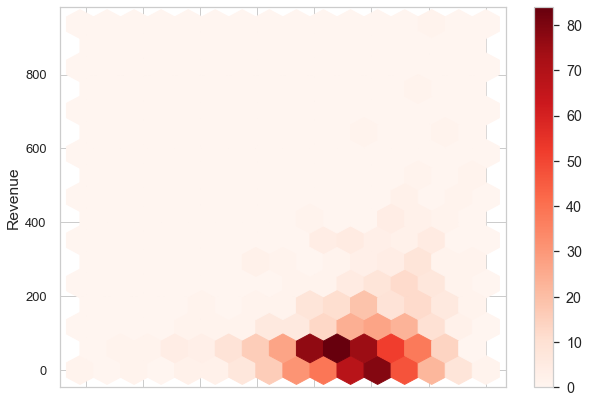

In [0]:
df_md.plot(kind='hexbin', figsize=(10,7), fontsize=13, gridsize=15, colormap='Reds',x="Rating", y="Revenue (Millions)")
plt.ylabel('Revenue')
plt.xlabel('Rating')